In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from pylab import *
%matplotlib inline
import numpy as np
from sklearn import datasets, linear_model
from sklearn import cross_validation as cv
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals import joblib

C:\Users\atropiano.DECIBEL-GROUP\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
#open the data file

df = pd.DataFrame.from_csv("../data/proc_data_it.csv")
#df = pd.DataFrame.from_csv("../data/proc_data_es.csv")
#df = pd.DataFrame.from_csv("../data/proc_data_de.csv")

features = df[["shots","shots_ontarget","shots_conceded","shots_conceded_ontarget","corners","corners_conceded"]]
target   = df["points"]

print features

print target

    shots  shots_ontarget  shots_conceded  shots_conceded_ontarget  corners  \
0     607             251             257                       83      228   
1     373             466             136                      175      130   
2     444             540             150                      186      128   
3     331             421             128                      145      143   
4     346             509             116                      159      117   
5     380             507             126                      211      151   
6     529             269             212                      110      191   
7     454             455             191                      158      146   
8     485             362             185                      143      217   
9     379             533             134                      202      137   
10    383             467             150                      165      145   
11    422             366             128           

In [31]:
df

,shots,shots_ontarget,shots_conceded,shots_conceded_ontarget,corners,corners_conceded,points
0,607,251,257,83,228,86,88
1,373,466,136,175,130,182,41
2,444,540,150,186,128,190,38
3,331,421,128,145,143,153,50
4,346,509,116,159,117,204,38
5,380,507,126,211,151,207,25
6,529,269,212,110,191,110,78
7,454,455,191,158,146,137,55
8,485,362,185,143,217,140,60
9,379,533,134,202,137,207,37


In [32]:
# Split the data into training/testing sets
#X_train, X_test, y_train, y_test = cv.train_test_split(features, target, test_size=0.33, random_state=42)

#print np.array(X_test)[:,0]
#print np.array(y_test)[:]

# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=False)

#print len(X_train)
#print len(y_train)
# Train the model using the training sets
#regr.fit(X_train, y_train)

scores = cv.cross_val_score(regr, features, target,cv=4)
print("Regression scores", scores)
print("Regression scores average %.2f" %np.mean(scores))
print("scores variance %.2f" %np.std(scores))

# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean square error
#print("Residual sum of squares: %.2f"
#      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.6f' % regr.score(X_test, y_test))

#print scores
regr.fit(features,target)
residuals = regr.predict(features) - target.values
print residuals
#print target.values

('Regression scores', array([ 0.79714787,  0.70282668,  0.72973585,  0.76949659]))
Regression scores average 0.75
scores variance 0.04
[ -4.10694815e+00  -3.27621371e+00   3.19120364e+00  -1.11224908e+01
   2.51472243e+00   4.34456488e+00  -1.32130210e+01  -1.73274644e+00
  -5.09359067e+00  -1.69524089e+00  -5.09044165e+00  -1.76890010e+00
   3.73990663e+00  -3.12790454e+00   6.76334074e+00   9.38436737e+00
   1.02222575e+01  -7.00274064e+00  -1.11224908e+01   3.73990663e+00
  -4.04898447e+00  -5.16768867e+00   1.00878775e+01  -3.14275655e+00
  -2.33961751e+00   4.13418543e+00   1.63298782e+00  -9.10213091e+00
   7.27174909e+00  -4.99314182e+00  -4.61244655e+00   1.67174835e+01
   6.07791247e+00  -8.93162475e+00  -5.56622151e+00  -2.34824723e+00
   1.14112035e+01  -6.54436281e-01  -8.93162475e+00   1.00878775e+01
  -6.96942302e+00  -5.68805536e+00  -3.67751931e+00   5.10354257e+00
   4.07482058e+00   4.76503658e+00  -1.87228284e+00  -5.88237602e+00
   4.96805353e+00  -5.91775093e-01   

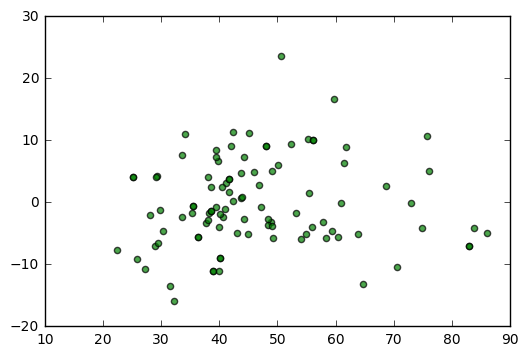

4908.74352677


In [33]:
plt.scatter(regr.predict(features), residuals,alpha=0.7,c="g")
plt.show()

print regr._residues

In [6]:
#apply the linear regression model to the full dataset and 
#save the regression data into a model to apply it later
regr.fit(features,target)
print regr.coef_
print regr.intercept_
joblib.dump(regr, '../data/linreg_model_de.pkl')  

[-0.02647548  0.02862991  0.36955371 -0.29904852  0.03275181  0.17623106]
0.0


['../data/linreg_model_de.pkl']

In [5]:
# Fit regression model Decision Tree
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor()

scores = cv.cross_val_score(regr_1, features, target,cv=4)
print("Regression Tree scores", scores)
print("Regression Tree scores average %.2f" %np.mean(scores))
print("Regression Tree scores variance %.2f" %np.std(scores))


scores = cv.cross_val_score(regr_2, features, target,cv=4)
print("Regression Tree2 scores", scores)
print("Regression Tree2 scores average %.2f" %np.mean(scores))
print("Regression Tree2 scores variance %.2f" %np.std(scores))


scores = cv.cross_val_score(regr_3, features, target,cv=4)
print("Regression Tree3 scores", scores)
print("Regression Tree3 scores average %.2f" %np.mean(scores))
print("Regression Tree3 scores variance %.2f" %np.std(scores))


('Regression Tree scores', array([ 0.69605004,  0.71517164,  0.4260596 ,  0.66756858]))
Regression Tree scores average 0.63
Regression Tree scores variance 0.12
('Regression Tree2 scores', array([ 0.68904641,  0.80840017,  0.51923538,  0.61117082]))
Regression Tree2 scores average 0.66
Regression Tree2 scores variance 0.11
('Regression Tree3 scores', array([ 0.6291568 ,  0.78115838,  0.50546525,  0.56808597]))
Regression Tree3 scores average 0.62
Regression Tree3 scores variance 0.10


In [6]:
#apply the regression tree model to the full dataset and 
#save the regression data into a model to apply it later
regr_2.fit(features,target)
joblib.dump(regr_2, '../data/regtree_model.pkl')  

['../data/regtree_model.pkl',
 '../data/regtree_model.pkl_01.npy',
 '../data/regtree_model.pkl_02.npy',
 '../data/regtree_model.pkl_03.npy']